<a href="https://colab.research.google.com/github/archiechang/study/blob/master/Data%20Analytics/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E5%AE%9F%E8%A3%85/03_%E5%AE%9F%E8%B7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/My Drive/data/original.csv")

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
import seaborn as sns

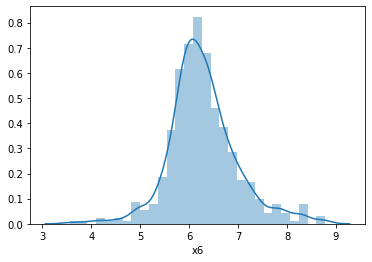

In [ ]:
sns.distplot(df['x6'])

# 外れ値除去(3$\sigma$法)





In [ ]:
col='x6'

In [ ]:
# 平均
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [ ]:
mean[col]

6.284634387351788

In [ ]:
#　標準偏差(standard deviation)
sigma=df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [ ]:
sigma[col]

0.7026171434153234

In [ ]:
low=mean[col]-3*sigma[col]
low

4.176782957105817

In [ ]:
high=mean[col]+3*sigma[col]

In [ ]:
df2 = df[(df[col] > low)&(df[col] < high)]

In [ ]:
len(df2)

498

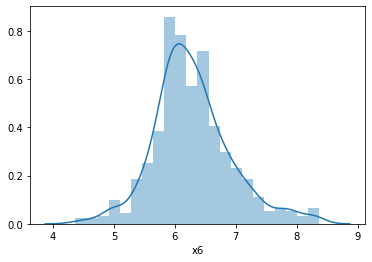

In [ ]:
# 分布の確認
sns.distplot(df2[col])

## 全変数適用

In [ ]:
cols=df.columns
cols
_df=df
mean=_df.mean()
sigma=_df.std()

In [ ]:
for col in cols:
    #3σ法による上下限値設定
    low=mean[col] - 3*sigma[col]
    high=mean[col] + 3*sigma[col]
    #条件での絞り込み
    _df=_df[(_df[col] > low) & (_df[col] < high)]
print(len(df)-len(_df))

91


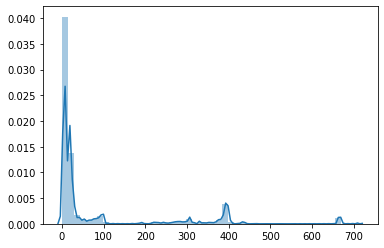

In [ ]:
sns.distplot(_df)

## サンプルが減る場合の対処法

- 外れ値を取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析等を使って、潜在変数に変換した後に3σ法を適用

# 入力変数と出力変数に分割

In [ ]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
# df.iloc[行,列]
X=_df.iloc[:,:-1]
y=_df.iloc[:,-1]

# 訓練データと検証データに分割

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

# 重回帰分析

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# モデルの宣言
model = LinearRegression()

In [ ]:
# モデルの学習
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#検証 ←訓練データ
model.score(X_train,y_train)

0.7972109224535133

In [ ]:
# 検証　←検証データ
model.score(X_test,y_test)

0.6253776004329594

In [ ]:
#過学習(オーバフィッティング)

# スケーリング

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scalerの宣言
scaler = StandardScaler()

In [ ]:
# scalerの学習←平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# スケーリング
X_train2=scaler.transform(X_train)
X_test2=scaler.transform(X_test)

In [ ]:
X_train2

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [ ]:
#　モデルの宣言
model2=LinearRegression()

In [ ]:
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(X_train2,y_train)

0.7972109224535133

In [ ]:
model.score(X_test2,y_test)

0.6253776004329598

In [ ]:
#　重みの確認
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

In [ ]:
np.set_printoptions(precision=3)

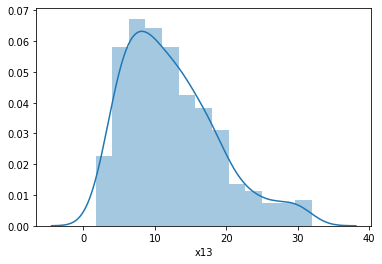

In [ ]:
sns.distplot(_df["x13"])